# Importing libraries
The necessary libraries needs to be imported in order to perform required analysis for further comparing the models of Decision tree, KNN, Logistic Regression and SVC.

In [1]:
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef,classification_report,roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Breast Cancer Data 

# Importing data
Imported the breast cancer dataset replacing the values in column "diagnosis" - "M" with 1 and "B" with 0. Here M stands for Malign and B for Benign.

In [2]:
col_names = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean",\
 "area_mean","smoothness_mean","compactness_mean","concavity_mean",\
 "concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se",\
 "texture_ses","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",\
 "concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst",\
 "perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst",\
 "concave points_worst" ,"symmetry_worst" ,"fractal_dimension_worst"]
data = pd.read_csv('wdbc.data', names = col_names )
data['diagnosis'] = data['diagnosis'].replace('M', 1)
data['diagnosis'] = data['diagnosis'].replace('B', 0)

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_ses,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Segmenting target and predictor data
Segmented the dataset in target data and predictor data. Here the target data is column "diagnosis" and predictor data consist all other columns excluding "ID".

In [4]:
X = data.iloc[:,2:]
Y = data.iloc[:,1]

In [5]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_ses,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [21]:
X = data.values[:,2:]
Y = data.values[:,1]

# Spliting target and predictor data into training and testing 
Splitted the target data and predictor data into training and testing, with 67 % data as training and 33 % as testing. 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# Scaling the data using MinMaxScaler
The data is scaled using MinMaxScaler on a range of 0 to 1.This process is same for all models. Although Decision Tree model doesn't require data to be scaled but for keeping the dataset uniform and on same scale for all models the same scaled data is used for Decision Tree model as well. 

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree 

## Finding Best hyperparameters
The parameters used are "max_depth" in the range of 1 to 30, "criterion" either entropy or gini, 'min_samples_leaf' in the range of 1 to 30. GridsearchCV function takes the classifier and all values of parameters and gives the best value for each parameter after a certain no. of iterations which is in our case taken as 10 (cv = 10). The best paramters with the best score on training data are printed after the following code. 

In [24]:
clf = DecisionTreeClassifier()
p_grid = {"max_depth": list(range(1,30)), "criterion" : ['entropy','gini'], 'min_samples_leaf' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10)
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('\033[1m' + 'Best Hyperparamters:' + "\033[0;0m", grid.best_params_ )
print('\033[1m' + 'Best Score:' + "\033[0;0m", grid.best_score_)

Best Hyperparamters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4}
Best Score: 0.94750656167979


## Using the best hyperparameters in building the final model.
The final model is build by using the best parameters generated using gridsearch. Below is the summary of the model. 

In [7]:
classifier_d = DecisionTreeClassifier(criterion = finalparam['criterion'], max_depth = finalparam['max_depth'],
                                      min_samples_leaf = finalparam['min_samples_leaf'])
classifier_d.fit(X_train_scaled, Y_train)
print('\033[1m' + "GOODNESS OF MODEL" + "\033[0;0m")
print('\033[1m' + "Accuracy:" + "\033[0;0m", accuracy_score(Y_test, classifier_d.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_d, X_train_scaled, Y_train, cv=10, scoring='f1'))
print('*' * 50)
print('*' * 50)
print('\033[1m' + "F1 Score:" + "\033[0;0m" "%0.2f (+/- %0.2f)" % (cross_val_score(classifier_d, X_train_scaled,
                                                                                   Y_train,cv=10,
                                                                                   scoring = 'f1').mean(),
                                       cross_val_score(classifier_d, X_train_scaled, Y_train,
                                                       cv=10, scoring='f1').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_d.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Confusion Matrix\n' + "\033[0;0m", confusion_matrix(Y_test, classifier_d.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Matthews Corrcoef' + "\033[0;0m", matthews_corrcoef(Y_test, classifier_d.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy: 0.9414893617021277
**************************************************
[0.9375     0.92857143 0.92307692 0.96296296 0.96296296 0.86666667
 0.92307692 0.89655172 0.92307692 1.        ]
**************************************************
**************************************************
F1 Score:0.93 (+/- 0.07)
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       117
         1.0       0.95      0.89      0.92        71

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188

**************************************************
Confusion Matrix
 [[114   3]
 [  8  63]]
**************************************************
Matthews Corrcoef 0.8752209519620431


## ROC curve
ROC - AUC curve measures the performance of the model at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. They are plotted between the True Positive Rate and False Positive Rate. The curve and area measures the performance of the model in distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. Area of 1 means all 0s and 1s have been predicted correctly by the model.It can be observed for the figure below that area is 0.971 for Decision Tree.  

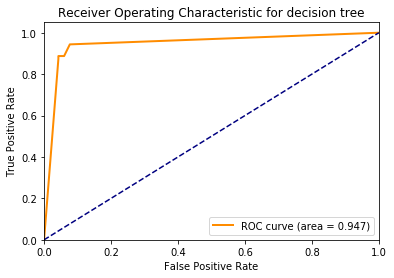

In [8]:
y_score = grid.best_estimator_.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for decision tree')
plt.legend(loc="lower right")
plt.show()

## Lift curve
The below graphs shows the performance of model to a random guess. It shows how does the model compare to random guessing given X number of samples. Here we can see the dashed line is line of random guess and other two lines are line for class 0 and class 1. The differnce between the baseline i.e. line of random guess and the other two lines of class 0 and class 1 respectively is known as the lift. The higher the lift better the model. It can be oberved from the figure that there's a significant differnce between the lines of classes and baseline.

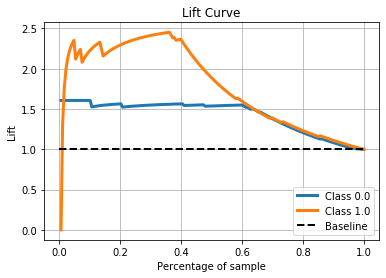

In [9]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds
The standard threshold for classification of the classes is set at 0.5. Following are the confusion matrix with different probability thresholds in the range of 0.1 to 1.0. Finally we are concerned with the confusion matrix giving the maximum f1 score for class 1 i.e. for malignant cancer. 

In [13]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print('\033[1m' + "Confusion Matrix with threshold",i/10,": - \n" + "\033[0;0m",confusion_matrix(Y_test, y_pred))
    print()
    print('\033[1m' + "Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print('\033[1m' + "f1 Score:" + "\033[0;0m"" %0.3f" % f1_score(Y_test, y_pred, average=None)[1])
    print(60*'*')
    
    f.append(f1_score(Y_test, y_pred, average=None)[1])

print('\033[1m'+'Threshold for maximum f1 score -' + "\033[0;0m")
print(' ')
print('The maximun f1 score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[108   9]
 [  4  67]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       117
         1.0       0.88      0.94      0.91        71

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

f1 Score: 0.912
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[108   9]
 [  4  67]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       117
         1.0       0.88      0.94      0.91        71

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

f1 Score: 0.912
************************************************************
Confus

# KNN

## Finding Best hyperparameters
The parameters used are "n_neighbors" in the range of 1 to 30, "weights" either entropy or gini. GridsearchCV function takes the classifier and all values of parameters and gives the best value for each parameter after a certain no. of iterations which is in our case taken as 10 (cv = 10). The best paramters with the best score on training data are printed after the following code. 

In [178]:
clf = KNeighborsClassifier()
p_grid = {'weights':["uniform", "distance"], 'n_neighbors' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10)
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('\033[1m' + 'Best Hyperparamters:' + "\033[0;0m", grid.best_params_ )
print('\033[1m' + 'Best Score:' + "\033[0;0m", grid.best_score_)

Best Hyperparamters: {'n_neighbors': 6, 'weights': 'distance'}
Best Score: 0.9763779527559056


## Using the best hyperparameters in building the final model.
The final model is build by using the best parameters generated using gridsearch. Below is the summary of the model.

In [179]:
classifier_k = KNeighborsClassifier(n_neighbors= finalparam['n_neighbors'], weights= finalparam['weights'])
classifier_k.fit(X_train_scaled, Y_train)
print('\033[1m' + "GOODNESS OF MODEL" + "\033[0;0m")
print('\033[1m' + "Accuracy :" + "\033[0;0m", accuracy_score(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_k, X_train_scaled, Y_train, cv=10, scoring='f1'))
print('*' * 50)
print('\033[1m' + "F1 Score:" + "\033[0;0m" " %0.2f (+/- %0.2f)" % (cross_val_score(classifier_k, X_train_scaled,
                                                                                    Y_train,
                                                       cv=10, scoring='f1').mean(),
                                       cross_val_score(classifier_k, X_train_scaled, Y_train,
                                                       cv=10, scoring='f1').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Confusion Matrix\n' + "\033[0;0m", confusion_matrix(Y_test, classifier_k.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Matthews Corrcoef' + "\033[0;0m", matthews_corrcoef(Y_test, classifier_k.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy : 0.9627659574468085
**************************************************
[1.         0.92857143 1.         0.88       0.96296296 0.96
 0.96296296 1.         1.         0.96      ]
**************************************************
F1 Score: 0.97 (+/- 0.07)
**************************************************
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       111
         1.0       0.97      0.94      0.95        77

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

**************************************************
Confusion Matrix
 [[109   2]
 [  5  72]]
**************************************************
Matthews Corrcoef 0.9230604038869875


## ROC curve
ROC - AUC curve measures the performance of the model at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. They are plotted between the True Positive Rate and False Positive Rate. The curve and area measures the performance of the model in distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. Area of 1 means all 0s and 1s have been predicted correctly by the model.It can be observed for the figure below that area is 0.980 for KNN which is higher than Decision Tree Classifier.  

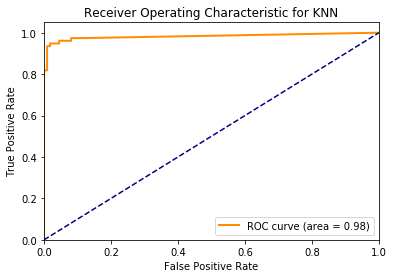

In [180]:
y_score = grid.best_estimator_.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

## Lift curve
The below graphs shows the performance of model to a random guess. It shows how does the model compare to random guessing given X number of samples. Here we can see the dashed line is line of random guess and other two lines are line for class 0 and class 1. The differnce between the baseline i.e. line of random guess and the other two lines of class 0 and class 1 respectively is known as the lift. The higher the lift better the model. It can be oberved from the figure that there's a significant differnce between the lines of classes and baseline.

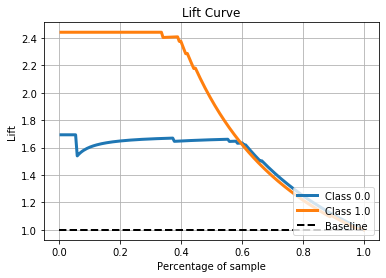

In [181]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds
The standard threshold for classification of the classes is set at 0.5. Following are the confusion matrix with different probability thresholds in the range of 0.1 to 1.0. Finally we are concerned with the confusion matrix giving the maximum f1 score for class 1 i.e. for malignant cancer. 

In [182]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print('\033[1m' + "Confusion Matrix with threshold",i/10,": - \n" + "\033[0;0m",confusion_matrix(Y_test, y_pred))
    print()
    print('\033[1m' + "Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print('\033[1m' + "f1 Score:" + "\033[0;0m"" %0.3f" % f1_score(Y_test, y_pred, average=None)[1])
    print(60*'*')
    
    f.append(f1_score(Y_test, y_pred, average=None)[1])

print('\033[1m'+'Threshold for maximum f1 score -' + "\033[0;0m")
print(' ')
print('The maximun f1 score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[98 13]
 [ 2 75]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       111
         1.0       0.85      0.97      0.91        77

    accuracy                           0.92       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.92      0.92       188

f1 Score: 0.909
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[106   5]
 [  3  74]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       111
         1.0       0.94      0.96      0.95        77

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

f1 Score: 0.949
************************************************************
Confusion 

# Logistic Regression

## Finding Best hyperparameters
The parameters used are "C" in the range of 1 to 30, "penalty" either l1 or l2. GridsearchCV function takes the classifier and all values of parameters and gives the best value for each parameter after a certain no. of iterations which is in our case taken as 10 (cv = 10). The best paramters with the best score on training data are printed after the following code. 

In [183]:
clf = LogisticRegression()
p_grid = {'penalty':["l1", "l2"], 'C' : list(range(1,30))}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10)
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('\033[1m' + 'Best Hyperparamters:' + "\033[0;0m", grid.best_params_ )
print('\033[1m' + 'Best Score:' + "\033[0;0m", grid.best_score_)

Best Hyperparamters: {'C': 15, 'penalty': 'l1'}
Best Score: 0.9711286089238845


## Using the best hyperparameters in building the final model.
The final model is build by using the best parameters generated using gridsearch. Below is the summary of the model.

In [184]:
classifier_l = LogisticRegression(C= finalparam['C'], penalty = finalparam['penalty'])
classifier_l.fit(X_train_scaled, Y_train)
print('\033[1m' + "GOODNESS OF MODEL" + "\033[0;0m")
print('\033[1m' + "Accuracy :" + "\033[0;0m", accuracy_score(Y_test, classifier_l.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_l, X_train_scaled, Y_train, cv=10, scoring='f1'))
print('*' * 50)
print('\033[1m' + "F1 Score:" + "\033[0;0m"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_l,
                                                                                   X_train_scaled, Y_train, cv=10,
                                                       scoring='f1').mean(),
                                       cross_val_score(classifier_l, X_train_scaled, Y_train, cv=10,
                                                       scoring='f1').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_l.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Confusion Matrix\n' + "\033[0;0m", confusion_matrix(Y_test, classifier_l.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Matthews Corrcoef' + "\033[0;0m", matthews_corrcoef(Y_test, classifier_l.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy : 0.9680851063829787
**************************************************
[1.         0.92857143 1.         0.92307692 0.88       0.91666667
 0.96296296 1.         1.         0.96296296]
**************************************************
F1 Score: 0.96 (+/- 0.08)
**************************************************
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       111
         1.0       0.96      0.96      0.96        77

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

**************************************************
Confusion Matrix
 [[108   3]
 [  3  74]]
**************************************************
Matthews Corrcoef 0.934011934011934


## ROC curve
ROC - AUC curve measures the performance of the model at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. They are plotted between the True Positive Rate and False Positive Rate. The curve and area measures the performance of the model in distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. Area of 1 means all 0s and 1s have been predicted correctly by the model.It can be observed for the figure below that area is 0.985 for Logistice Regression which is higher than Decision Tree Classifier and KNN Classifier.  

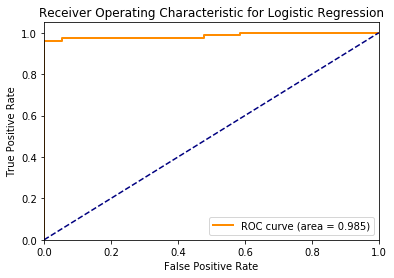

In [185]:
y_score = grid.best_estimator_.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Lift curve
The below graphs shows the performance of model to a random guess. It shows how does the model compare to random guessing given X number of samples. Here we can see the dashed line is line of random guess and other two lines are line for class 0 and class 1. The differnce between the baseline i.e. line of random guess and the other two lines of class 0 and class 1 respectively is known as the lift. The higher the lift better the model. It can be oberved from the figure that there's a significant differnce between the lines of classes and baseline.

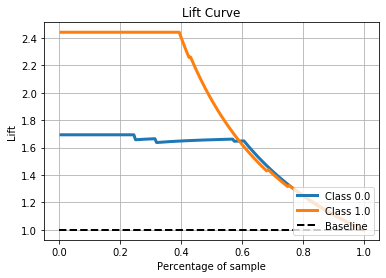

In [186]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds
The standard threshold for classification of the classes is set at 0.5. Following are the confusion matrix with different probability thresholds in the range of 0.1 to 1.0. Finally we are concerned with the confusion matrix giving the maximum f1 score for class 1 i.e. for malignant cancer. 

In [187]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print('\033[1m' + "Confusion Matrix with threshold",i/10,": - \n" + "\033[0;0m",confusion_matrix(Y_test, y_pred))
    print()
    print('\033[1m' + "Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print('\033[1m' + "f1 Score:" + "\033[0;0m"" %0.3f" % f1_score(Y_test, y_pred, average=None)[1])
    print(60*'*')
    
    f.append(f1_score(Y_test, y_pred, average=None)[1])

print('\033[1m' + 'Threshold for maximum f1 score -' + "\033[0;0m")
print(' ')
print('The maximun f1 score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[103   8]
 [  2  75]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       111
         1.0       0.90      0.97      0.94        77

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188

f1 Score: 0.938
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[105   6]
 [  2  75]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       111
         1.0       0.93      0.97      0.95        77

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

f1 Score: 0.949
************************************************************
Confus

# SVM 

## Finding Best hyperparameters
The parameters used are "C" in the range of 1 to 30, "gamma" either auto or scale, 'degree' in the range of 1 to 30 and 'kernal' either linear or poly or rbf or sigmoid. GridsearchCV function takes the classifier and all values of parameters and gives the best value for each parameter after a certain no. of iterations which is in our case taken as 10 (cv = 10). The best paramters with the best score on training data are printed after the following code. 

In [188]:
clf = SVC(probability = True)
p_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid' ], 'C' : list(range(1,30)),
          'degree': list(range(3,8)), 'gamma': ['auto', 'scale']}
grid = GridSearchCV(estimator = clf, param_grid = p_grid, cv = 10)
grid.fit(X_train_scaled, Y_train)
finalparam = grid.best_params_
print('\033[1m' + 'Best Hyperparamters:' + "\033[0;0m", grid.best_params_ )
print('\033[1m' + 'Best Score:' + "\033[0;0m", grid.best_score_)

Best Hyperparamters: {'C': 4, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.979002624671916


## Using the best hyperparameters in building the final model.
The final model is build by using the best parameters generated using gridsearch. Below is the summary of the model.

In [189]:
classifier_S = SVC(kernel= finalparam['kernel'], C = finalparam['C'], degree = finalparam['degree'],
                   gamma = finalparam['gamma'], probability = True)
classifier_S.fit(X_train_scaled, Y_train)
print('\033[1m' + "GOODNESS OF MODEL" + "\033[0;0m")
print('\033[1m' + "Accuracy :" + "\033[0;0m", accuracy_score(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print(cross_val_score(classifier_S, X_train_scaled, Y_train, cv=10, scoring='f1'))
print('*' * 50)
print('\033[1m' + "F1 Score:" + "\033[0;0m"" %0.2f (+/- %0.2f)" % (cross_val_score(classifier_S,
                                                                                   X_train_scaled, Y_train,
                                                       cv=10, scoring='f1').mean(),
                                       cross_val_score(classifier_S, X_train_scaled, Y_train,
                                                       cv=10, scoring='f1').std() * 2))
print('*' * 50)
print(classification_report(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Confusion Matrix\n' + "\033[0;0m", confusion_matrix(Y_test, classifier_S.predict(X_test_scaled)))
print('*' * 50)
print('\033[1m' + 'Matthews Corrcoef' + "\033[0;0m", matthews_corrcoef(Y_test, classifier_S.predict(X_test_scaled)))

GOODNESS OF MODEL
Accuracy : 0.9893617021276596
**************************************************
[1.         0.96296296 1.         0.88       0.96296296 0.91666667
 0.96296296 1.         1.         1.        ]
**************************************************
F1 Score: 0.97 (+/- 0.08)
**************************************************
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       111
         1.0       1.00      0.97      0.99        77

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

**************************************************
Confusion Matrix
 [[111   0]
 [  2  75]]
**************************************************
Matthews Corrcoef 0.9781546791053054


## ROC curve
ROC - AUC curve measures the performance of the model at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. They are plotted between the True Positive Rate and False Positive Rate. The curve and area measures the performance of the model in distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. Area of 1 means all 0s and 1s have been predicted correctly by the model.It can be observed for the figure below that area is 0.992 for SVM which is higher than Decision Tree Classifier, KNN Classifier and Logistic Regression Classifier. Model build using SVM is better in predicting 0s as 0s and 1s as 1s when compred to other classifiers.   

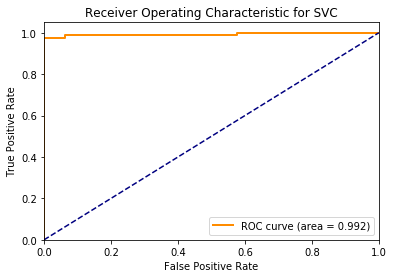

In [190]:
y_score = grid.best_estimator_.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(Y_test, (y_score[:,1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVC')
plt.legend(loc="lower right")
plt.show()

## Lift curve
The below graphs shows the performance of model to a random guess. It shows how does the model compare to random guessing given X number of samples. Here we can see the dashed line is line of random guess and other two lines are line for class 0 and class 1. The differnce between the baseline i.e. line of random guess and the other two lines of class 0 and class 1 respectively is known as the lift. The higher the lift better the model. It can be oberved from the figure that there's a significant differnce between the lines of classes and baseline.

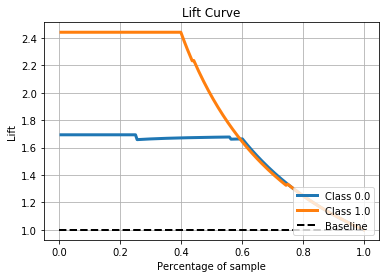

In [191]:
skplt.metrics.plot_lift_curve(Y_test, y_score)
plt.show()

## Confusion matrix with different probability thresholds
The standard threshold for classification of the classes is set at 0.5. Following are the confusion matrix with different probability thresholds in the range of 0.1 to 1.0. Finally we are concerned with the confusion matrix giving the maximum f1 score for class 1 i.e. for malignant cancer. 

In [192]:
f = []
for i in range(1,11,1):
    y_pred = np.where(y_score[:,1] > i/10,1,0)
    print('\033[1m' + "Confusion Matrix with threshold",i/10,": - \n" + "\033[0;0m",confusion_matrix(Y_test, y_pred))
    print()
    print('\033[1m' + "Classification Report: - \n" + "\033[0;0m",classification_report(Y_test, y_pred))
    print('\033[1m' + "f1 Score:" + "\033[0;0m"" %0.3f" % f1_score(Y_test, y_pred, average=None)[1])
    print(60*'*')
    
    f.append(f1_score(Y_test, y_pred, average=None)[1])

print('\033[1m' + 'Threshold for maximum f1 score -' + "\033[0;0m")
print(' ')
print('The maximun f1 score is:','%.3f' % max(f),'with threshold', (f.index(max(f))+1)/10)

Confusion Matrix with threshold 0.1 : - 
 [[98 13]
 [ 1 76]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       111
         1.0       0.85      0.99      0.92        77

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188

f1 Score: 0.916
************************************************************
Confusion Matrix with threshold 0.2 : - 
 [[103   8]
 [  1  76]]

Classification Report: - 
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       111
         1.0       0.90      0.99      0.94        77

    accuracy                           0.95       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.95      0.95       188

f1 Score: 0.944
************************************************************
Confusion 

# Comparing Accuracies, f1-score,ROC curve(area) for all Classifiers

In [232]:
df1 = pd.DataFrame({"Accuracy":[0.9308,0.9627,0.9680,0.9893],"f1-score":[0.92,0.95,0.96,0.99],"ROC curve(area)":[0.971,0.980,0.985,0.992]})
df1.index = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM']
df1

,Accuracy,f1-score,ROC curve(area)
Decision Tree,0.9308,0.92,0.971
KNN,0.9627,0.95,0.980
Logistic Regression,0.9680,0.96,0.985
SVM,0.9893,0.99,0.992


# Model Evalutaion - All Models
The above table describes the accuracy, f1-score and ROC curve(area) for all models i.e Decision Tree, KNN, Logistic Regression and SVM respectively. It can be observed that SVM has the highest accuracy, f1-score which is the harmonic mean of precision and recall and ROC curve(area) when compared to other models thus SVM is the best model for given data and should be finalized for the analysis. 